In [1]:
import mne
import scipy
import numpy as np
import pandas as pd

In [26]:
subject = 1111
session = 1

## Load Data

In [27]:
mne_epochs = mne.io.read_epochs_eeglab('EEG_data\s' + str(subject) + '\sbj' + str(subject) + '_emotion_attention_epoch_artifactfree.set')

Extracting parameters from e:\Work\FIBO\Internship\EmotionAttention_EEG_shuffledCSI_shrinked\Processing\EEG_data\s1111\sbj1111_emotion_attention_epoch_artifactfree.set...


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_36476\2788066290.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  mne_epochs = mne.io.read_epochs_eeglab('EEG_data\s' + str(subject) + '\sbj' + str(subject) + '_emotion_attention_epoch_artifactfree.set')


Not setting metadata
1620 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_36476\2788066290.py:1: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  mne_epochs = mne.io.read_epochs_eeglab('EEG_data\s' + str(subject) + '\sbj' + str(subject) + '_emotion_attention_epoch_artifactfree.set')


In [4]:
# Load experiment infomation
ex_info = scipy.io.loadmat('EEG_data/s' + str(subject) + '/flanker_emo_EEG_code_sbj' + str(subject) + '_session' + str(session) + '.mat')

# Emotion and frequency pattern conditions
emo = ex_info['b']['emo_HA_AN_NE'][0][0][0]
freqPat = ex_info['b']['freqPatInd'][0][0][0]

## Edit Events

In [28]:
new_events = []

for i in range(len(mne_epochs.events)):
    new_events.append([mne_epochs.events[i][0], 0, emo[i]*10 + freqPat[i]])

new_events = np.array(new_events)
new_event_id = {
    'HA-f1': 11,
    'HA-f2': 12,
    'AN-f1': 21,
    'AN-f2': 22,
    'NE-f1': 31,
    'NE-f2': 32,
}

mne_epochs = mne.EpochsArray(mne_epochs.get_data(), mne_epochs.info, new_events, tmin=mne_epochs.tmin, event_id=new_event_id)
mne_epochs.set_montage(mne.channels.make_standard_montage('standard_1020'))
mne_epochs

Not setting metadata
1620 matching events found
No baseline correction applied
0 projection items activated


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_36476\1055939427.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  mne_epochs = mne.EpochsArray(mne_epochs.get_data(), mne_epochs.info, new_events, tmin=mne_epochs.tmin, event_id=new_event_id)


Number of events,1620
Events,AN-f1: 270AN-f2: 270HA-f1: 270HA-f2: 270NE-f1: 270NE-f2: 270
Time range,-0.500 – 1.498 s
Baseline,off


In [29]:
# Load rejected epoch
reject_info = scipy.io.loadmat('EEG_data/s9999/sbj9999_emotion_attention_epoch_rejthreshold.mat')
reject = reject_info['reject'][0].astype(bool)

# Epoch rejection
mne_epochs.drop(reject)

Dropped 177 epochs: 0, 1, 7, 8, 38, 39, 45, 69, 78, 95, 97, 120, 179, 180, 185, 186, 193, 194, 208, 209, 226, 239, 240, 248, 270, 276, 282, 283, 284, 336, 341, 343, 347, 360, 363, 396, 397, 420, 438, 440, 450, 451, 456, 487, 496, 504, 506, 523, 524, 536, 537, 540, 541, 550, 552, 560, 561, 563, 570, 576, 577, 584, 586, 587, 597, 609, 611, 614, 619, 623, 626, 630, 636, 646, 665, 677, 679, 680, 720, 750, 752, 770, 810, 813, 817, 818, 826, 837, 838, 848, 861, 862, 878, 884, 890, 900, 902, 903, 916, 917, 919, 931, 934, 942, 958, 964, 966, 971, 978, 979, 991, 996, 1010, 1018, 1028, 1079, 1080, 1081, 1082, 1089, 1100, 1101, 1137, 1138, 1159, 1169, 1170, 1175, 1177, 1182, 1194, 1201, 1204, 1220, 1221, 1228, 1229, 1241, 1248, 1261, 1267, 1282, 1289, 1301, 1319, 1329, 1350, 1351, 1355, 1361, 1368, 1379, 1383, 1390, 1410, 1425, 1440, 1441, 1456, 1457, 1461, 1472, 1487, 1488, 1498, 1501, 1507, 1508, 1511, 1545, 1549, 1550, 1577, 1578, 1590, 1592, 1595


Number of events,1443
Events,AN-f1: 238AN-f2: 242HA-f1: 235HA-f2: 239NE-f1: 242NE-f2: 247
Time range,-0.500 – 1.498 s
Baseline,off


# **Data Overview**

### All electrodes

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


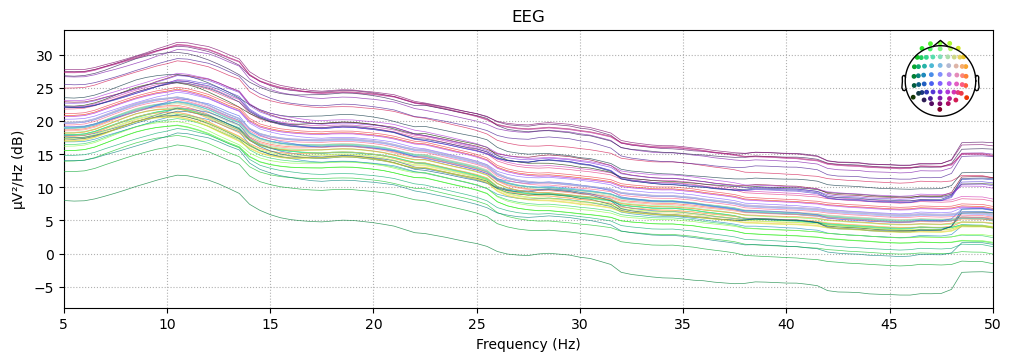

In [49]:
mne_epochs.compute_psd(fmin=5,fmax=50).plot()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


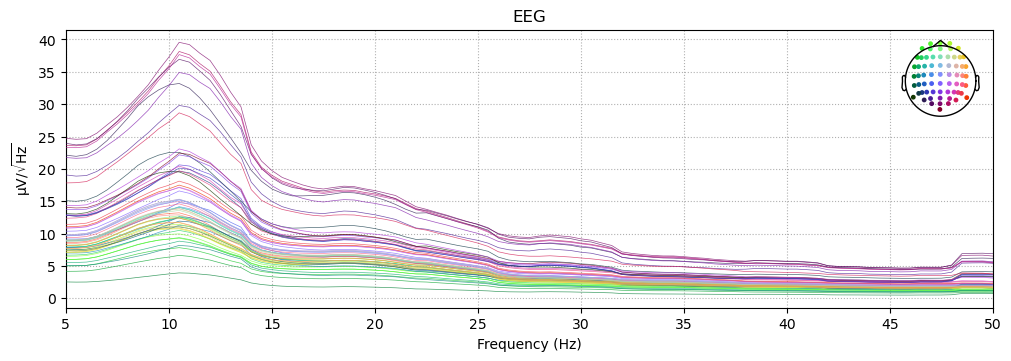

In [48]:
mne_epochs.compute_psd(fmin=5,fmax=50).plot(dB=False)

### Occipital electrodes

In [32]:
occ_related_electrodes = ['P1','PO3','O1','Pz','POz','Oz','Iz','P2','PO4','O2']

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


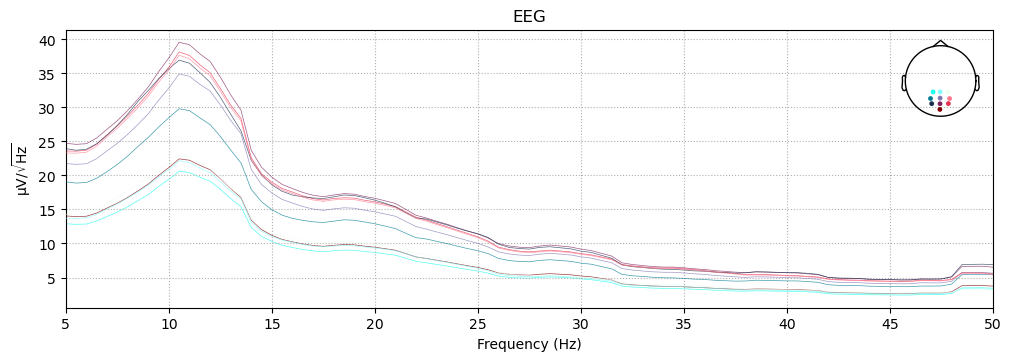

In [50]:
mne_epochs.compute_psd(fmin=5,fmax=50,picks=occ_related_electrodes).plot(dB=False)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


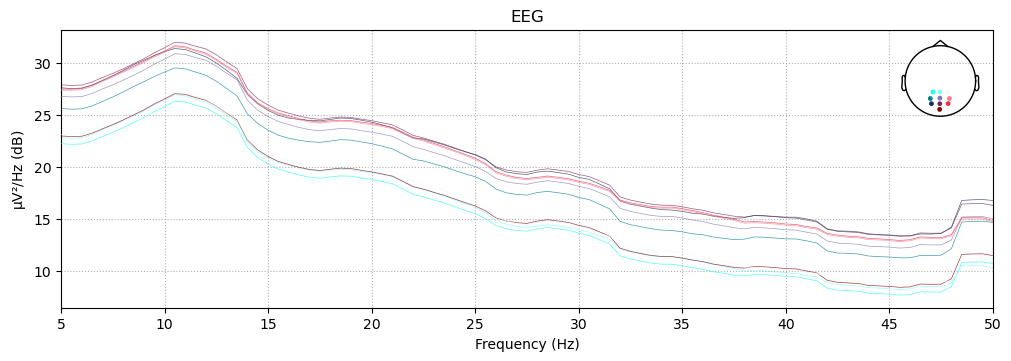

In [51]:
mne_epochs.compute_psd(fmin=5,fmax=50,picks=occ_related_electrodes).plot()

# **PSD for each condition**

## **In Log-Scale**

### **1. Frequency Pattern 1**: [face: 16 Hz, inner: 22 Hz, outer: 37 Hz]

#### 1.1. Happy

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


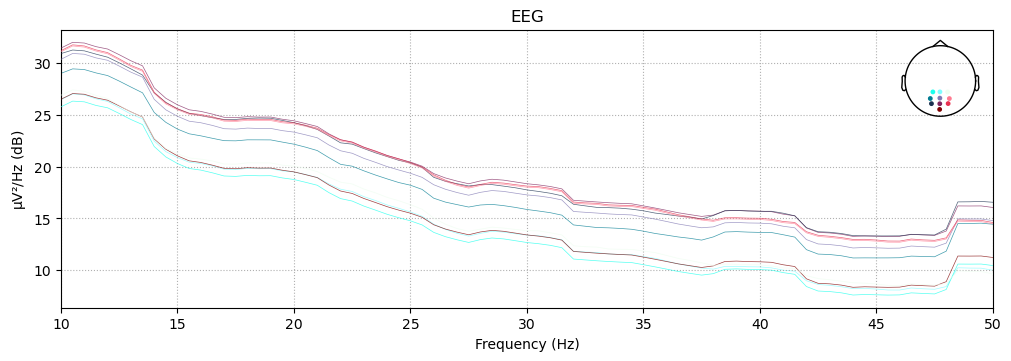

In [35]:
mne_epochs['HA-f1'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot()

#### 1.2. Angry

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


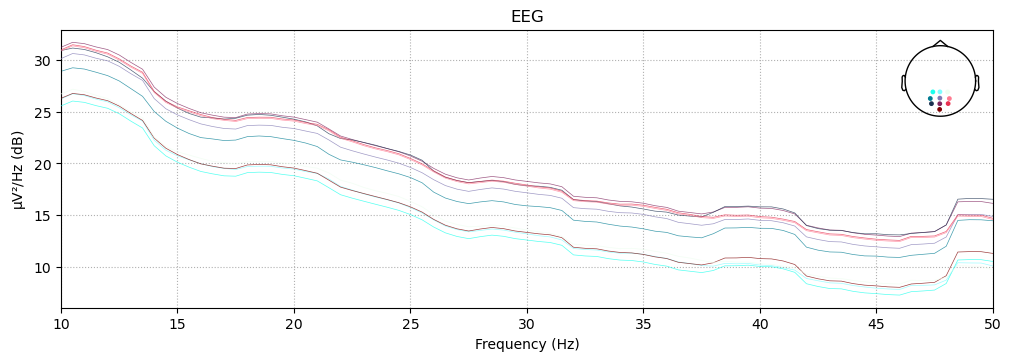

In [36]:
mne_epochs['AN-f1'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot()

#### 1.3. Neutral

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


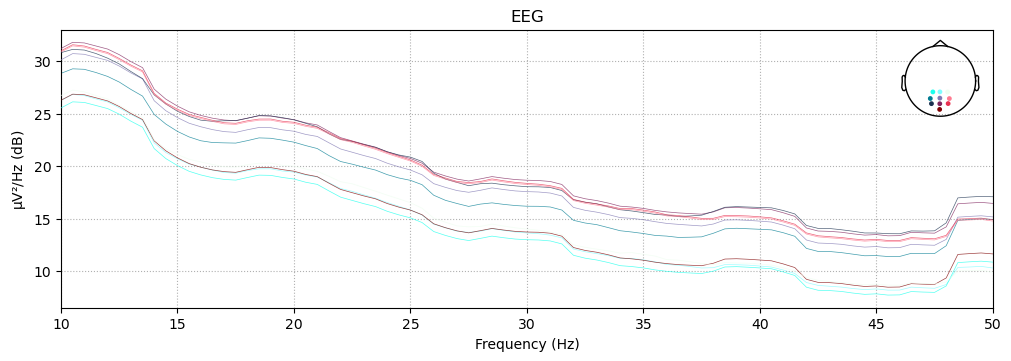

In [37]:
mne_epochs['NE-f1'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot()

### **2. Frequency Pattern 2**: [face: 16 Hz, inner: 37 Hz, outer: 22 Hz]

#### 2.1. Happy

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


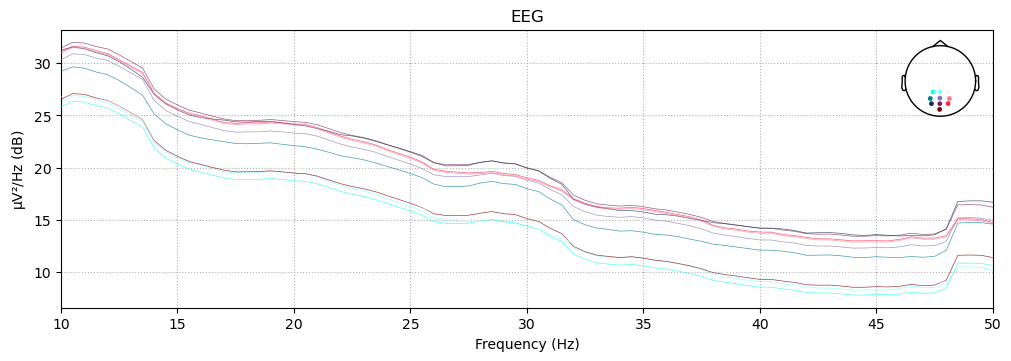

In [38]:
mne_epochs['HA-f2'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot()

#### 2.2. Angry

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


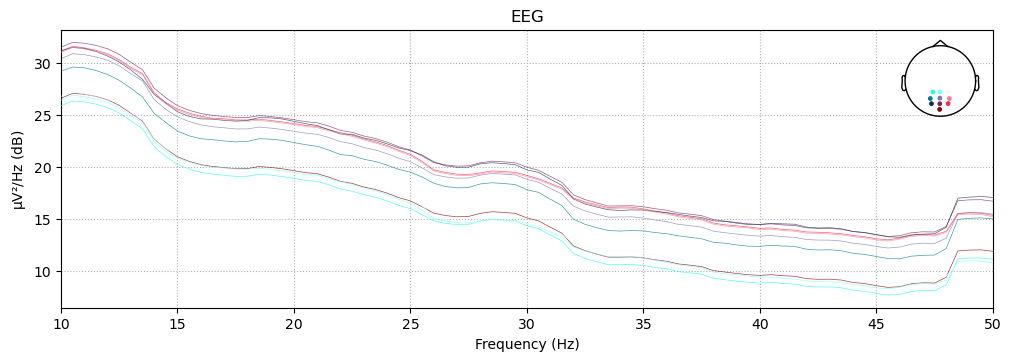

In [39]:
mne_epochs['AN-f2'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot()

#### 2.3. Neutral

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


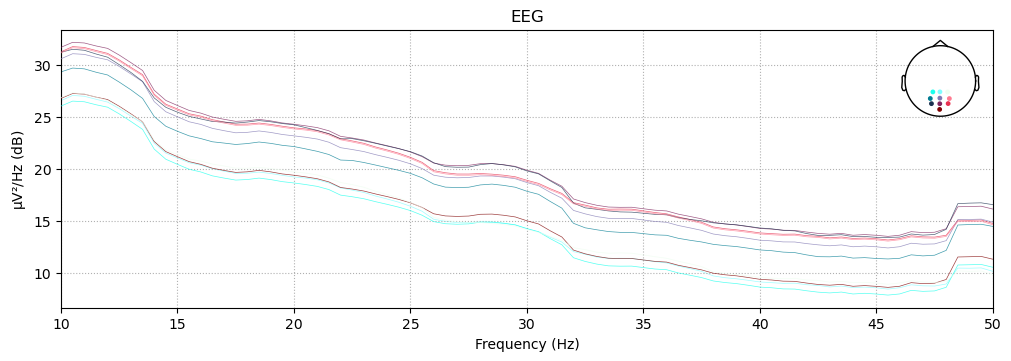

In [40]:
mne_epochs['NE-f2'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot()

## **In Linear Scale**

### **1. Frequency Pattern 1**: [face: 16 Hz, inner: 22 Hz, outer: 37 Hz]

#### 1.1. Happy

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


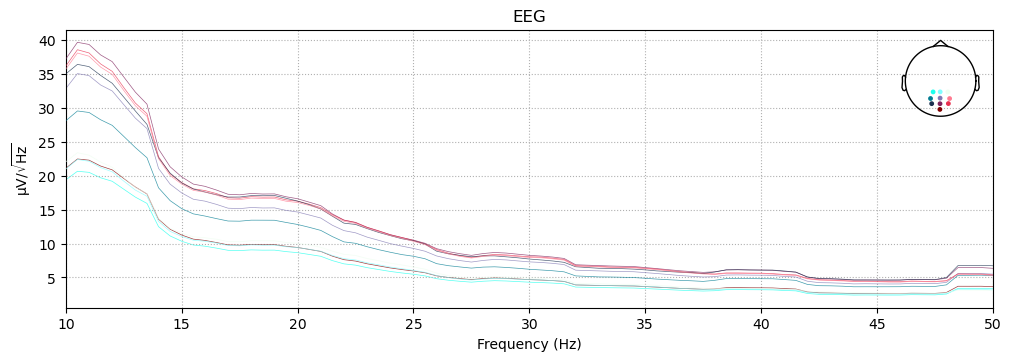

In [41]:
mne_epochs['HA-f1'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot(dB=False)

#### 1.2. Angry

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


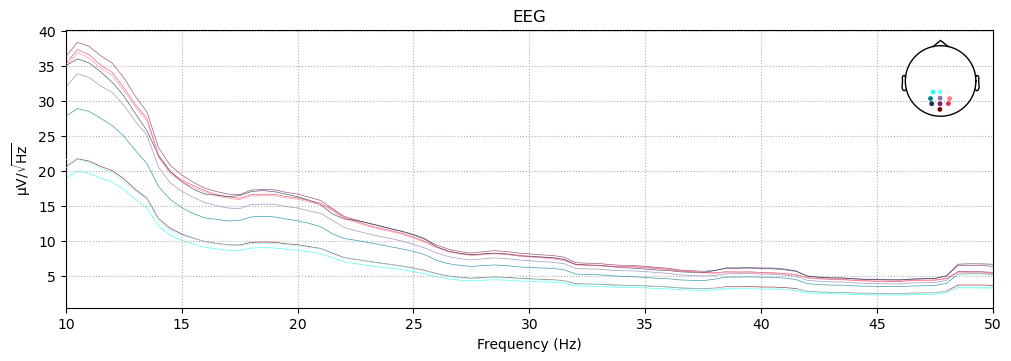

In [47]:
mne_epochs['AN-f1'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot(dB=False)

#### 1.3. Neutral

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


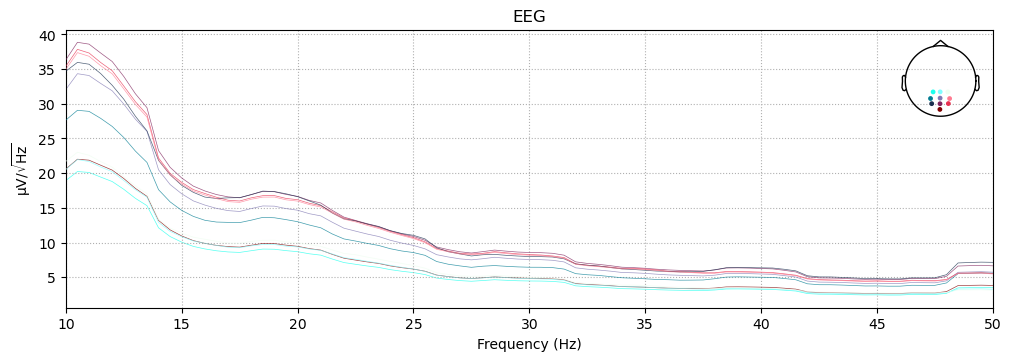

In [46]:
mne_epochs['NE-f1'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot(dB=False)

### **2. Frequency Pattern 2**: [face: 16 Hz, inner: 37 Hz, outer: 22 Hz]

#### 2.1. Happy

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


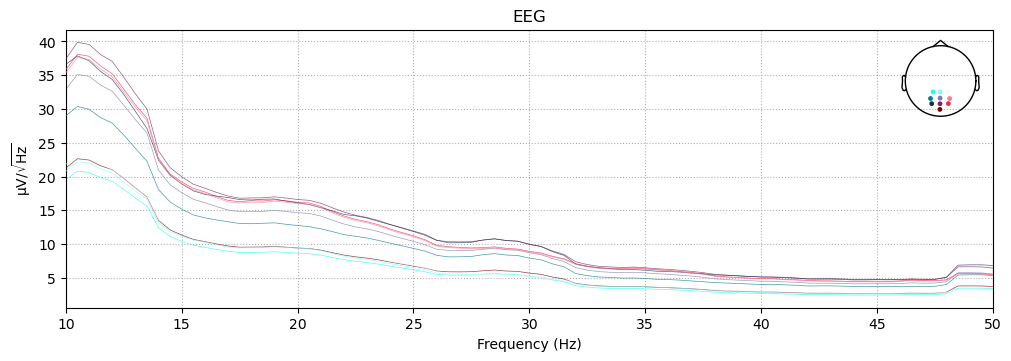

In [45]:
mne_epochs['HA-f2'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot(dB=False)

#### 2.2. Angry

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


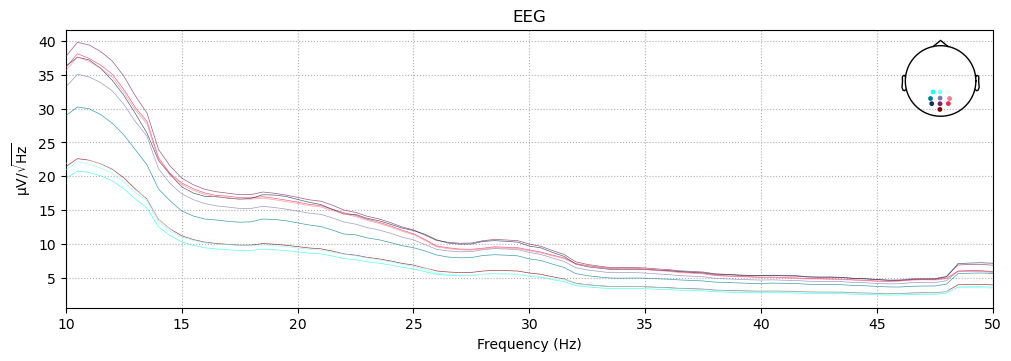

In [44]:
mne_epochs['AN-f2'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot(dB=False)

#### 2.3. Neutral

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\AbsoluteZeno\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


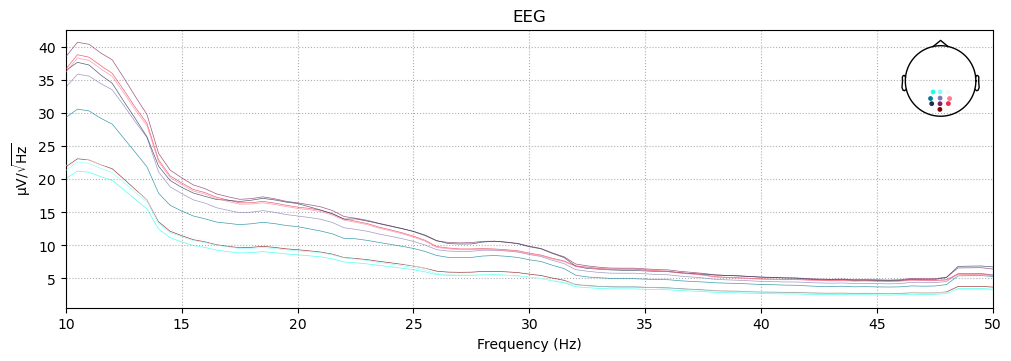

In [43]:
mne_epochs['NE-f2'].compute_psd(fmin=10,fmax=50,picks=occ_related_electrodes).plot(dB=False)